In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 92.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


**JOINING CSVS TOGETHER**

In [ ]:
csv1 = 'DoS.csv'
csv2 = 'FTPSSH.csv'
csv3 = 'PortScan.csv'
csv4 = 'Webattack.csv'

In [ ]:
df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)
df3 = pd.read_csv(csv3)
df4 = pd.read_csv(csv4)

In [ ]:
#selecting all rows and all columns from the csvs
values1 = df1.iloc[:]
values2 = df2.iloc[:]
values3 = df3.iloc[:]
values4 = df4.iloc[:]

In [ ]:
dataframes = [values1, values2, values3, values4]
join = pd.concat(dataframes)
print(join)

In [ ]:
join.to_csv('dataset.csv')

**CLEANING THE DATASET**

In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/fypdataset/dataset.csv')

In [ ]:
#print(dataset)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128487 entries, 0 to 1128486
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1128487 non-null  int64  
 1    Destination Port             1128487 non-null  int64  
 2    Flow Duration                1128487 non-null  int64  
 3    Total Fwd Packets            1128487 non-null  int64  
 4    Total Backward Packets       1128487 non-null  int64  
 5   Total Length of Fwd Packets   1128487 non-null  int64  
 6    Total Length of Bwd Packets  1128487 non-null  int64  
 7    Fwd Packet Length Max        1128487 non-null  int64  
 8    Fwd Packet Length Min        1128487 non-null  int64  
 9    Fwd Packet Length Mean       1128487 non-null  float64
 10   Fwd Packet Length Std        1128487 non-null  float64
 11  Bwd Packet Length Max         1128487 non-null  int64  
 12   Bwd Packet Length Min      


**REMOVING UNNECESSARY COLUMNS**

In [ ]:
#after feature importance was calculated, only the top 11 important columns (including the output column) are kept remvoing the rest
dataset = dataset.drop(dataset.columns[[0, 3, 6, 7, 12 14, 15, 16,
                                        18, 19, 20, 21, 22, 23, 24, 25, 27, 
                                        28, 29, 31, 32, 33, 34, 35, 38, 
                                        39, 40, 41, 42, 43, 45, 48, 
                                        49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 
                                        60, 62, 66, 67, 68, 69, 70, 71, 
                                        72, 73, 74, 75, 76]], axis=1)

In [ ]:
new_dataset = dataset.iloc[:, [9, 5, 67, 53, 1, 11, 12, 47, 14, 66, 2, 48, 38, 63, 18, 37, 27, 31, 45, 79]]

print(new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128487 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Fwd Packet Length Mean      1128487 non-null  float64
 1   Total Length of Fwd Packets  1128487 non-null  int64  
 2   Init_Win_bytes_forward       1128487 non-null  int64  
 3    Average Packet Size         1128487 non-null  float64
 4    Destination Port            1128487 non-null  int64  
 5   Bwd Packet Length Max        1128487 non-null  int64  
 6    Bwd Packet Length Min       1128487 non-null  int64  
 7    PSH Flag Count              1128487 non-null  int64  
 8    Bwd Packet Length Std       1128487 non-null  float64
 9    Subflow Bwd Bytes           1128487 non-null  int64  
 10   Flow Duration               1128487 non-null  int64  
 11   ACK Flag Count              1128487 non-null  int64  
 12   Bwd Packets/s               1128487 non-n

In [ ]:
new_dataset.to_csv('new_dataset_19_col_notprepro.csv', index=False)

**REMOVING NULL VALUES**

In [ ]:
print(new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128487 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Fwd Packet Length Mean      1128487 non-null  float64
 1   Total Length of Fwd Packets  1128487 non-null  int64  
 2   Init_Win_bytes_forward       1128487 non-null  int64  
 3    Average Packet Size         1128487 non-null  float64
 4    Destination Port            1128487 non-null  int64  
 5   Bwd Packet Length Max        1128487 non-null  int64  
 6    Bwd Packet Length Min       1128487 non-null  int64  
 7    PSH Flag Count              1128487 non-null  int64  
 8    Bwd Packet Length Std       1128487 non-null  float64
 9    Subflow Bwd Bytes           1128487 non-null  int64  
 10   Flow Duration               1128487 non-null  int64  
 11   ACK Flag Count              1128487 non-null  int64  
 12   Bwd Packets/s               1128487 non-n

In [ ]:
dataset = new_dataset.dropna()
#print(dataset.info())
print(dataset)

**DROPPING DUPLICATE RECORDS IN THE DATASET**

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128487 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Fwd Packet Length Mean      1128487 non-null  float64
 1   Total Length of Fwd Packets  1128487 non-null  int64  
 2   Init_Win_bytes_forward       1128487 non-null  int64  
 3    Average Packet Size         1128487 non-null  float64
 4    Destination Port            1128487 non-null  int64  
 5   Bwd Packet Length Max        1128487 non-null  int64  
 6    Bwd Packet Length Min       1128487 non-null  int64  
 7    PSH Flag Count              1128487 non-null  int64  
 8    Bwd Packet Length Std       1128487 non-null  float64
 9    Subflow Bwd Bytes           1128487 non-null  int64  
 10   Flow Duration               1128487 non-null  int64  
 11   ACK Flag Count              1128487 non-null  int64  
 12   Bwd Packets/s               1128487 non-n

In [ ]:
dataset.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1128482    False
1128483    False
1128484    False
1128485     True
1128486    False
Length: 1128487, dtype: bool

In [ ]:
dataset = new_dataset.drop_duplicates()
#print(dataset)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996760 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0    Fwd Packet Length Mean      996760 non-null  float64
 1   Total Length of Fwd Packets  996760 non-null  int64  
 2   Init_Win_bytes_forward       996760 non-null  int64  
 3    Average Packet Size         996760 non-null  float64
 4    Destination Port            996760 non-null  int64  
 5   Bwd Packet Length Max        996760 non-null  int64  
 6    Bwd Packet Length Min       996760 non-null  int64  
 7    PSH Flag Count              996760 non-null  int64  
 8    Bwd Packet Length Std       996760 non-null  float64
 9    Subflow Bwd Bytes           996760 non-null  int64  
 10   Flow Duration               996760 non-null  int64  
 11   ACK Flag Count              996760 non-null  int64  
 12   Bwd Packets/s               996760 non-null  float64
 13

**CHECKING THE DATASET FOR INFINITE VALUES**

In [ ]:
count = np.isinf(dataset).values.sum()

In [ ]:
count

**PUTTING COLUMN NAMES INTO THE LOWER CASE FORMAT**

In [ ]:
dataset.columns = dataset.columns.str.lower()

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996760 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0    fwd packet length mean      996760 non-null  float64
 1   total length of fwd packets  996760 non-null  int64  
 2   init_win_bytes_forward       996760 non-null  int64  
 3    average packet size         996760 non-null  float64
 4    destination port            996760 non-null  int64  
 5   bwd packet length max        996760 non-null  int64  
 6    bwd packet length min       996760 non-null  int64  
 7    psh flag count              996760 non-null  int64  
 8    bwd packet length std       996760 non-null  float64
 9    subflow bwd bytes           996760 non-null  int64  
 10   flow duration               996760 non-null  int64  
 11   ack flag count              996760 non-null  int64  
 12   bwd packets/s               996760 non-null  float64
 13

**ALTERING INDENTATIONS OF THE COLUMN NAMES IN THE DATASET**

In [ ]:
column_names = ["fwd packet length mean",
                "total length of fwd packets",
                "init_win_bytes_forward",
                "average packet size",
                "destination port",
                "bwd packet length max",
                "bwd packet length min",
                "psh flag count",
                "bwd packet length std",
                "subflow bwd packets",
                "flow duration", 
                "ack flag count",
                "bwd packets/s",
                "subflow fwd packets", 
                "flow iat std",
                "fwd packets/s",
                "bwd iat mean",
                "fwd psh flags",
                "syn flag count",
                "label"]

In [ ]:
dataset.columns = column_names

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996760 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       996760 non-null  float64
 1   total length of fwd packets  996760 non-null  int64  
 2   init_win_bytes_forward       996760 non-null  int64  
 3   average packet size          996760 non-null  float64
 4   destination port             996760 non-null  int64  
 5   bwd packet length max        996760 non-null  int64  
 6   bwd packet length min        996760 non-null  int64  
 7   psh flag count               996760 non-null  int64  
 8   bwd packet length std        996760 non-null  float64
 9   subflow bwd packets          996760 non-null  int64  
 10  flow duration                996760 non-null  int64  
 11  ack flag count               996760 non-null  int64  
 12  bwd packets/s                996760 non-null  float64
 13

**0S IN THE DATASET**

In [ ]:
dataset.to_csv('dataset_binarydataset.csv', index=False)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996760 entries, 0 to 1128486
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       996760 non-null  float64
 1   total length of fwd packets  996760 non-null  int64  
 2   init_win_bytes_forward       996760 non-null  int64  
 3   average packet size          996760 non-null  float64
 4   destination port             996760 non-null  int64  
 5   bwd packet length max        996760 non-null  int64  
 6   bwd packet length min        996760 non-null  int64  
 7   psh flag count               996760 non-null  int64  
 8   bwd packet length std        996760 non-null  float64
 9   subflow bwd packets          996760 non-null  int64  
 10  flow duration                996760 non-null  int64  
 11  ack flag count               996760 non-null  int64  
 12  bwd packets/s                996760 non-null  float64
 13

In [ ]:
dataset['fwd packet length mean']= dataset['fwd packet length mean'].replace([0], 'NaN')
dataset['total length of fwd packets']= dataset['total length of fwd packets'].replace([0], 'NaN')
dataset['init_win_bytes_forward']= dataset['init_win_bytes_forward'].replace([0], 'NaN')
dataset['average packet size']= dataset['average packet size'].replace([0], 'NaN')
dataset['destination port']= dataset['destination port'].replace([0], 'NaN')
dataset['bwd packet length max']= dataset['bwd packet length max'].replace([0], 'NaN')
dataset['bwd packet length min']= dataset['bwd packet length min'].replace([0], 'NaN')
dataset['psh flag count']= dataset['psh flag count'].replace([0], 'NaN')
dataset['bwd packet length std']= dataset['bwd packet length std'].replace([0], 'NaN')
dataset['subflow bwd packets']= dataset['subflow bwd packets'].replace([0], 'NaN')
dataset['flow duration']= dataset['flow duration'].replace([0], 'NaN')
dataset['ack flag count']= dataset['ack flag count'].replace([0], 'NaN')
dataset['bwd packets/s']= dataset['bwd packets/s'].replace([0], 'NaN')
dataset['subflow fwd packets']= dataset['subflow fwd packets'].replace([0], 'NaN')
dataset['flow iat std']= dataset['flow iat std'].replace([0], 'NaN')
dataset['fwd packets/s']= dataset['fwd packets/s'].replace([0], 'NaN')
dataset['bwd iat mean']= dataset['bwd iat mean'].replace([0], 'NaN')
dataset['fwd psh flags']= dataset['fwd psh flags'].replace([0], 'NaN')
dataset['syn flag count']= dataset['syn flag count'].replace([0], 'NaN')

In [ ]:
dataset

In [ ]:
dataset = dataset.ffill(axis=0)

In [ ]:
dataset = dataset.replace(['NaN']) 

In [ ]:
dataset.to_csv('without zeros.csv', index=False)

In [ ]:
dataset

In [ ]:
dataset['fwd packet length mean']= dataset['fwd packet length mean'].replace(['NaN'], 0)
dataset['total length of fwd packets']= dataset['total length of fwd packets'].replace(['NaN'], 0)
dataset['init_win_bytes_forward']= dataset['init_win_bytes_forward'].replace(['NaN'], 0)
dataset['average packet size']= dataset['average packet size'].replace(['NaN'], 0)
dataset['destination port']= dataset['destination port'].replace(['NaN'], 0)
dataset['bwd packet length max']= dataset['bwd packet length max'].replace(['NaN'], 0)
dataset['bwd packet length min']= dataset['bwd packet length min'].replace(['NaN'], 0)
dataset['psh flag count']= dataset['psh flag count'].replace(['NaN'], 0)
dataset['bwd packet length std']= dataset['bwd packet length std'].replace(['NaN'], 0)
dataset['subflow bwd packets']= dataset['subflow bwd packets'].replace(['NaN'], 0)
dataset['flow duration']= dataset['flow duration'].replace(['NaN'], 0)
dataset['ack flag count']= dataset['ack flag count'].replace(['NaN'], 0)
dataset['bwd packets/s']= dataset['bwd packets/s'].replace(['NaN'], 0)
dataset['subflow fwd packets']= dataset['subflow fwd packets'].replace(['NaN'], 0)
dataset['flow iat std']= dataset['flow iat std'].replace(['NaN'], 0)
dataset['fwd packets/s']= dataset['fwd packets/s'].replace(['NaN'], 0)
dataset['bwd iat mean']= dataset['bwd iat mean'].replace(['NaN'], 0)
dataset['fwd psh flags']= dataset['fwd psh flags'].replace(['NaN'], 0)
dataset['syn flag count']= dataset['syn flag count'].replace(['NaN'], 0)

dataset

In [ ]:
dataset['bwd packet length max']= dataset['bwd packet length max'].replace([0], 6)
dataset['bwd packet length min']= dataset['bwd packet length min'].replace([0], 6)
dataset['psh flag count']= dataset['psh flag count'].replace([0], 1)
dataset['bwd packet length std']= dataset['bwd packet length std'].replace([0], 320)
dataset['subflow bwd packets']= dataset['subflow bwd packets'].replace([0], 6)
dataset['bwd packets/s']= dataset['bwd packets/s'].replace([0], 9174)
dataset['flow iat std']= dataset['flow iat std'].replace([0], 24)
dataset['bwd iat mean']= dataset['bwd iat mean'].replace([0], 2)
dataset['fwd psh flags']= dataset['fwd psh flags'].replace([0], 1)
dataset['syn flag count']= dataset['syn flag count'].replace([0], 1)

In [ ]:
(dataset == 0).sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
1128480    0
1128482    0
1128483    0
1128484    0
1128486    0
Length: 996760, dtype: int64

In [ ]:
dataset

In [ ]:
#dataset = dataset.astype(int)

In [ ]:
dataset

In [ ]:
(dataset == 0).sum(axis=1)

In [ ]:
dataset.to_csv('with negs.csv', index=False)

In [ ]:
print(dataset.info())

**GETTING RID OF NEGATIVE VALUES**

In [ ]:
dataset.min()

fwd packet length mean         0.00740003
total length of fwd packets             1
init_win_bytes_forward                  1
average packet size                   0.2
destination port                        1
bwd packet length max                   1
bwd packet length min                   1
psh flag count                          1
bwd packet length std            0.301511
subflow bwd packets                     1
flow duration                           1
ack flag count                          1
bwd packets/s                  0.00833336
subflow fwd packets                     1
flow iat std                     0.288675
fwd packets/s                  0.00847804
bwd iat mean                     0.333333
fwd psh flags                           1
syn flag count                          1
label                              BENIGN
dtype: object

In [ ]:
dataset.max()

fwd packet length mean              4672
total length of fwd packets      2428415
init_win_bytes_forward             65535
average packet size                 3893
destination port                   65532
bwd packet length max              13140
bwd packet length min               2896
bwd packet length std               8194
subflow bwd packets            627040569
flow duration                  119999993
bwd packets/s                    2000000
subflow fwd packets               206446
output                                 1
dtype: int64

In [ ]:
dataset['init_win_bytes_forward'].replace(-1,1, inplace=True)

In [ ]:
dataset['flow duration'].replace(-2,1, inplace=True)

**CHECKING FOR THE TYPE OF ATTACKS IN LABEL AND REPLACING WITH APPROPRIATE NAMES**

In [ ]:
print(dataset['label'].unique())

['BENIGN' 'DDoS' 'FTP-Patator' 'SSH-Patator' 'PortScan'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']


In [ ]:
dataset['label'].replace('Web Attack � Brute Force','Web Attack', inplace=True)
dataset['label'].replace('Web Attack � XSS', inplace=True)
dataset['label'].replace('Web Attack � Sql Injection','Web Attack', inplace=True)

dataset['label'].replace('FTP-Patator','Brute Force', inplace=True)
dataset['label'].replace('SSH-Patator','Brute Force', inplace=True)

In [ ]:
print(dataset['label'].unique())

['BENIGN' 'DDoS' 'Brute Force' 'PortScan' 'Web Attack']


**FEATURE MATRIX**

In [ ]:
print(dataset.info())

In [ ]:
# x is the matrix of features 
#taking all rows and columns except the last label column
x = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
print(x)

**DEPENDANT VARIABLE**

In [ ]:
# y is the dependant varible which is the last column specifiying which attack
y = dataset.iloc[:, 19].values
print(y)

[0 0 0 ... 0 0 0]


**ENCODING THE DEPENDANT VARIABLE**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#Creating an object of the class LabelEncoder
le = LabelEncoder()
dataset['output']= le.fit_transform(y)

**SPLITING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
#from sklearn.model_selection import train_test_split
#test is 30% and training is 70%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

**TRAINING THE MODEL**

In [ ]:
#Using entropy as criterion is info gain
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

**CALCULATING FEATURE IMPORTANCE**

In [ ]:
importance = classifier.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

#the numpy array [::-1] indicates selection of all 
#columns except the last label column

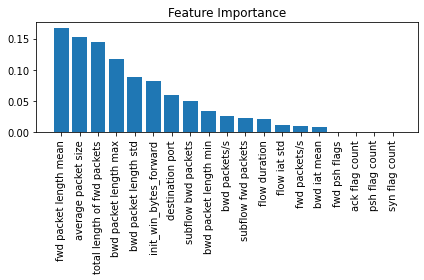

In [ ]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout() #ensures everything fits into the figure 
plt.show()

**REMOVAL/DROPPING OF UNREQUIRED COLUMNS**

In [ ]:
dataset = pd.read_csv('Done_prepro.csv')
print(dataset.info())

In [ ]:
dataset = dataset.drop(dataset.columns[[7, 11, 14, 15, 16, 17, 18]], axis=1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996760 entries, 0 to 1128486
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       996760 non-null  float64
 1   total length of fwd packets  996760 non-null  int64  
 2   init_win_bytes_forward       996760 non-null  int64  
 3   average packet size          996760 non-null  float64
 4   destination port             996760 non-null  int64  
 5   bwd packet length max        996760 non-null  int64  
 6   bwd packet length min        996760 non-null  int64  
 7   bwd packet length std        996760 non-null  float64
 8   subflow bwd packets          996760 non-null  int64  
 9   flow duration                996760 non-null  int64  
 10  bwd packets/s                996760 non-null  float64
 11  subflow fwd packets          996760 non-null  int64  
 12  label                        996760 non-null  object 
dty

**MAKING THE DATASET A BINARY DATASET**

Preprocessing was reconducted to make the dataset a binary dataset

In [ ]:
dataset['label'].replace('DDoS','ATTACK', inplace=True)
dataset['label'].replace('Brute Force','ATTACK', inplace=True)
dataset['label'].replace('PortScan','ATTACK', inplace=True)
dataset['label'].replace('Web Attack','ATTACK', inplace=True)

In [ ]:
print(dataset['label'].unique())

['BENIGN' 'ATTACK']


In [ ]:
x = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
y = dataset.iloc[:, 12]

In [ ]:
y = pd.get_dummies(y)

In [ ]:
df = pd.concat([x, y], axis=1)

In [ ]:
df

,fwd packet length mean,total length of fwd packets,init_win_bytes_forward,average packet size,destination port,bwd packet length max,bwd packet length min,bwd packet length std,subflow bwd packets,flow duration,bwd packets/s,subflow fwd packets,ATTACK,BENIGN
0,6.000000,12,33,9.000000,54865,6,6,320.000000,6,3,9174.000000,2,0,1
1,6.000000,6,29,9.000000,55054,6,6,320.000000,6,109,9174.311927,1,0,1
2,6.000000,6,29,9.000000,55055,6,6,320.000000,6,52,19230.769230,1,0,1
3,6.000000,6,31,9.000000,46236,6,6,320.000000,6,34,29411.764710,1,0,1
4,6.000000,12,32,9.000000,54863,6,6,320.000000,6,3,29411.764710,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128480,64.975610,2664,29200,115.879518,22,976,41,320.403796,6954,1286687,32.641971,41,0,1
1128482,6.000000,6,29200,7.500000,55641,6,6,320.403796,18,49,61224.489800,1,0,1
1128483,15.500000,31,137,22.666667,45337,6,6,320.403796,6,217,4608.294931,2,0,1
1128484,66.536585,2728,29200,107.609195,22,976,6,307.913979,6634,1387547,33.152030,41,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996760 entries, 0 to 1128486
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       996760 non-null  float64
 1   total length of fwd packets  996760 non-null  int64  
 2   init_win_bytes_forward       996760 non-null  int64  
 3   average packet size          996760 non-null  float64
 4   destination port             996760 non-null  int64  
 5   bwd packet length max        996760 non-null  int64  
 6   bwd packet length min        996760 non-null  int64  
 7   bwd packet length std        996760 non-null  float64
 8   subflow bwd packets          996760 non-null  int64  
 9   flow duration                996760 non-null  int64  
 10  bwd packets/s                996760 non-null  float64
 11  subflow fwd packets          996760 non-null  int64  
 12  ATTACK                       996760 non-null  uint8  
 13

In [ ]:
df.to_csv('with ohe.csv', index=False)



**REMOVING THE LABEL (OBJ) COLUMN FROM THE DATASET**

In [ ]:
dataset = dataset.drop(dataset.columns[[13]], axis=1)
print(dataset.info())

**VISUALIZING THE DISTRIBUTION**

Text(0.5, 1.0, 'Distribution visualization')

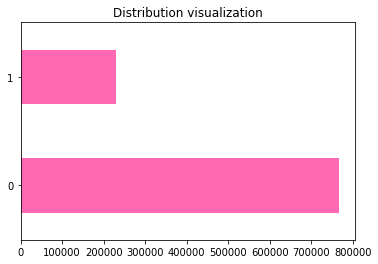

In [ ]:
import matplotlib.pyplot as plt
output_count = dataset['output'].value_counts()
output_count.plot(kind='barh', color='hotpink')
plt.title('Distribution visualization')

**MINMAX SCALER TO SCALE THE FEATURES**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/fypdataset/final_dataset.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993718 entries, 0 to 993717
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   fwd packet length mean       993718 non-null  int64
 1   total length of fwd packets  993718 non-null  int64
 2   init_win_bytes_forward       993718 non-null  int64
 3   average packet size          993718 non-null  int64
 4   destination port             993718 non-null  int64
 5   bwd packet length max        993718 non-null  int64
 6   bwd packet length min        993718 non-null  int64
 7   bwd packet length std        993718 non-null  int64
 8   subflow bwd packets          993718 non-null  int64
 9   flow duration                993718 non-null  int64
 10  bwd packets/s                993718 non-null  int64
 11  subflow fwd packets          993718 non-null  int64
 12  output                       993718 non-null  int64
dtypes: int64(13)
memory usage: 98

In [ ]:
from sklearn.model_selection import train_test_split
x = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
y = dataset.iloc[:, 12].values

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [ ]:
print(x_test.shape)

(298116, 12)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
x_train = mm_scaler.fit_transform(x_train)
x_test = mm_scaler.transform(x_test)

In [ ]:
import numpy as np
train_arr = np.column_stack((x_train, y_train))

In [ ]:
train = pd.DataFrame(data=train_arr, columns=['fwd packet length mean', 'total length of fwd packets', 'init_win_bytes_forward', 
                     'average packet size', 'destination port', 'bwd packet length max', 'bwd packet length min', 'bwd packet length std', 
                     'subflow bwd packets', 'flow duration', 'bwd packets/s', 'subflow fwd packets', 'output'])

In [ ]:
train.mean()

fwd packet length mean         0.019529
total length of fwd packets    0.000293
init_win_bytes_forward         0.114148
average packet size            0.070946
destination port               0.137962
bwd packet length max          0.100561
bwd packet length min          0.040748
bwd packet length std          0.111877
subflow bwd packets            0.000042
flow duration                  0.101915
bwd packets/s                  0.004926
subflow fwd packets            0.000045
output                         0.230632
dtype: float64

The mean of each feature was obtained, which further indicated the features were not on the same scale as a mean of 0.5 was not obtained per feature thus indicating the dataset compromised of outliers

**ROBUST SCALER**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/fypdataset/final_dataset.csv')

x = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
y = data.iloc[:, 12]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import RobustScaler
robust_s = RobustScaler()
x_train = robust_s.fit_transform(x_train)
x_test = robust_s.transform(x_test)

In [ ]:
import numpy as np
#joing both feature and output arrays of train and test set
train_arr = np.column_stack((x_train, y_train))
test_arr = np.column_stack((x_test, y_test))

In [ ]:
train = pd.DataFrame(data=train_arr, columns=['fwd packet length mean', 'total length of fwd packets', 'init_win_bytes_forward', 
                     'average packet size', 'destination port', 'bwd packet length max', 'bwd packet length min', 'bwd packet length std', 
                     'subflow bwd packets', 'flow duration', 'bwd packets/s', 'subflow fwd packets', 'output'])

In [ ]:
test = pd.DataFrame(data=test_arr, columns=['fwd packet length mean', 'total length of fwd packets', 'init_win_bytes_forward', 
                     'average packet size', 'destination port', 'bwd packet length max', 'bwd packet length min', 'bwd packet length std', 
                     'subflow bwd packets', 'flow duration', 'bwd packets/s', 'subflow fwd packets', 'output'])

In [ ]:
train.to_csv('train_rs.csv', index=False)
test.to_csv('test_rs.csv', index=False)

In [ ]:
train_data.max()

fwd packet length mean             96.441860
total length of fwd packets     16188.980000
init_win_bytes_forward              7.969601
average packet size                20.846154
destination port                   65.452000
bwd packet length max               9.308298
bwd packet length min              25.486486
bwd packet length std               8.899857
subflow bwd packets            161234.340190
flow duration                      31.071028
bwd packets/s                     210.234101
subflow fwd packets             68814.666667
output                              1.000000
dtype: float64

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/fypdataset/train_rs.csv')

**Z-SCORE FEATURE NORMALIZATION**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from scipy import stats
dataset = pd.read_csv('/content/drive/MyDrive/fypdataset/final_dataset.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996760 entries, 0 to 996759
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   fwd packet length mean       996760 non-null  int64
 1   total length of fwd packets  996760 non-null  int64
 2   init_win_bytes_forward       996760 non-null  int64
 3   average packet size          996760 non-null  int64
 4   destination port             996760 non-null  int64
 5   bwd packet length max        996760 non-null  int64
 6   bwd packet length min        996760 non-null  int64
 7   bwd packet length std        996760 non-null  int64
 8   subflow bwd packets          996760 non-null  int64
 9   flow duration                996760 non-null  int64
 10  bwd packets/s                996760 non-null  int64
 11  subflow fwd packets          996760 non-null  int64
 12  output                       996760 non-null  int64
dtypes: int64(13)
memory usage: 98

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.to_csv('final_dataset.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
x = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values
y = dataset.iloc[:, 12].values

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [ ]:
train_arr = np.column_stack((x_train, y_train))

In [ ]:
test_arr = np.column_stack((x_test, y_test))

In [ ]:
train = pd.DataFrame(data=train_arr, columns=['fwd packet length mean', 'total length of fwd packets', 'init_win_bytes_forward', 
                     'average packet size', 'destination port', 'bwd packet length max', 'bwd packet length min', 'bwd packet length std', 
                     'subflow bwd packets', 'flow duration', 'bwd packets/s', 'subflow fwd packets', 'output'])

In [ ]:
test = pd.DataFrame(data=test_arr, columns=['fwd packet length mean', 'total length of fwd packets', 'init_win_bytes_forward', 
                     'average packet size', 'destination port', 'bwd packet length max', 'bwd packet length min', 'bwd packet length std', 
                     'subflow bwd packets', 'flow duration', 'bwd packets/s', 'subflow fwd packets', 'output'])

In [ ]:
train['output'].value_counts()

0    535174
1    160428
Name: output, dtype: int64

In [ ]:
test['output'].value_counts()

0    229555
1     68561
Name: output, dtype: int64

In [ ]:
train.to_csv('train.csv', index=False)

In [ ]:
test.to_csv('test.csv', index=False)

In [ ]:
test

**APPLYING ZSCORE ON TRAINING SAMPLES**

In [ ]:
train_d = pd.read_csv('/content/drive/MyDrive/fypdataset/train.csv')
train_data = train_d.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
train_res = train_d.iloc[:, 12]

In [ ]:
from scipy.stats import zscore
train_data = train_data.apply(zscore)

In [ ]:
df = pd.concat([train_data, train_res], axis=1)

In [ ]:
df

,fwd packet length mean,total length of fwd packets,init_win_bytes_forward,average packet size,destination port,bwd packet length max,bwd packet length min,bwd packet length std,subflow bwd packets,flow duration,bwd packets/s,subflow fwd packets,output
0,-0.141214,-0.026751,-0.516951,-0.483740,1.555792,0.217704,4.866664,-0.243546,-0.005025,-0.400867,0.336414,-0.010256,0
1,-0.073741,-0.100690,-0.533055,-0.289914,-0.469454,-0.488258,0.016155,-0.668146,-0.008985,-0.400100,-0.196298,-0.011498,0
2,-0.302401,-0.110146,-0.460158,-0.593405,-0.398217,-0.535892,-0.452474,-0.619542,-0.009024,-0.400867,0.329391,-0.011498,1
3,0.031218,0.199870,0.050625,-0.414881,-0.449085,-0.327849,0.024166,-0.545260,-0.008626,3.400378,-0.195657,0.014585,0
4,-0.141214,-0.096505,-0.533055,-0.412330,-0.469454,-0.503321,-0.132044,-0.581025,-0.008968,-0.400861,-0.014419,-0.010256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695597,-0.111226,-0.052948,0.050625,-0.493941,-0.449085,-0.503729,-0.003872,-0.650722,-0.008970,-0.393092,-0.196718,-0.004046,0
695598,6.936004,1.687793,0.050625,3.099495,2.276207,-0.530192,-0.452474,-0.679151,-0.009017,-0.384614,-0.197058,-0.005288,0
695599,0.091194,0.842999,-0.524362,0.699620,2.531857,0.403355,-0.023899,-0.053714,0.014117,-0.400856,-0.197118,-0.010256,0
695600,-0.212436,0.017116,-0.508685,0.439485,-0.449085,0.056074,-0.284248,-0.086729,-0.000835,-0.400217,-0.196138,-0.011498,0


In [ ]:
train_df = df[(df < 3).all(axis=1)]

In [ ]:
train_df

,fwd packet length mean,total length of fwd packets,init_win_bytes_forward,average packet size,destination port,bwd packet length max,bwd packet length min,bwd packet length std,subflow bwd packets,flow duration,bwd packets/s,subflow fwd packets,output
1,-0.073741,-0.100690,-0.533055,-0.289914,-0.469454,-0.488258,0.016155,-0.668146,-0.008985,-0.400100,-0.196298,-0.011498,0
2,-0.302401,-0.110146,-0.460158,-0.593405,-0.398217,-0.535892,-0.452474,-0.619542,-0.009024,-0.400867,0.329391,-0.011498,1
4,-0.141214,-0.096505,-0.533055,-0.412330,-0.469454,-0.503321,-0.132044,-0.581025,-0.008968,-0.400861,-0.014419,-0.010256,0
6,-0.302401,-0.110146,-0.460158,-0.593405,0.654360,-0.535892,-0.452474,1.722636,-0.009024,-0.400866,0.025179,-0.011498,1
7,-0.092484,-0.092475,-0.533055,-0.361323,-0.469454,-0.495179,-0.051937,-0.675483,-0.008954,-0.400862,0.001948,-0.010256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695596,0.184907,0.012621,1.547630,-0.389377,-0.468044,-0.453245,-0.452474,-0.611289,-0.008947,0.105802,0.110676,-0.005288,0
695597,-0.111226,-0.052948,0.050625,-0.493941,-0.449085,-0.503729,-0.003872,-0.650722,-0.008970,-0.393092,-0.196718,-0.004046,0
695599,0.091194,0.842999,-0.524362,0.699620,2.531857,0.403355,-0.023899,-0.053714,0.014117,-0.400856,-0.197118,-0.010256,0
695600,-0.212436,0.017116,-0.508685,0.439485,-0.449085,0.056074,-0.284248,-0.086729,-0.000835,-0.400217,-0.196138,-0.011498,0


In [ ]:
train_set = train_df[(train_df > -3).all(axis=1)]

In [ ]:
train_set

,fwd packet length mean,total length of fwd packets,init_win_bytes_forward,average packet size,destination port,bwd packet length max,bwd packet length min,bwd packet length std,subflow bwd packets,flow duration,bwd packets/s,subflow fwd packets,output
1,-0.073741,-0.100690,-0.533055,-0.289914,-0.469454,-0.488258,0.016155,-0.668146,-0.008985,-0.400100,-0.196298,-0.011498,0
2,-0.302401,-0.110146,-0.460158,-0.593405,-0.398217,-0.535892,-0.452474,-0.619542,-0.009024,-0.400867,0.329391,-0.011498,1
4,-0.141214,-0.096505,-0.533055,-0.412330,-0.469454,-0.503321,-0.132044,-0.581025,-0.008968,-0.400861,-0.014419,-0.010256,0
6,-0.302401,-0.110146,-0.460158,-0.593405,0.654360,-0.535892,-0.452474,1.722636,-0.009024,-0.400866,0.025179,-0.011498,1
7,-0.092484,-0.092475,-0.533055,-0.361323,-0.469454,-0.495179,-0.051937,-0.675483,-0.008954,-0.400862,0.001948,-0.010256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695596,0.184907,0.012621,1.547630,-0.389377,-0.468044,-0.453245,-0.452474,-0.611289,-0.008947,0.105802,0.110676,-0.005288,0
695597,-0.111226,-0.052948,0.050625,-0.493941,-0.449085,-0.503729,-0.003872,-0.650722,-0.008970,-0.393092,-0.196718,-0.004046,0
695599,0.091194,0.842999,-0.524362,0.699620,2.531857,0.403355,-0.023899,-0.053714,0.014117,-0.400856,-0.197118,-0.010256,0
695600,-0.212436,0.017116,-0.508685,0.439485,-0.449085,0.056074,-0.284248,-0.086729,-0.000835,-0.400217,-0.196138,-0.011498,0


In [ ]:
train_set.mean()

fwd packet length mean        -0.138881
total length of fwd packets   -0.063420
init_win_bytes_forward        -0.158033
average packet size           -0.251657
destination port               0.020684
bwd packet length max         -0.250365
bwd packet length min         -0.166054
bwd packet length std         -0.218827
subflow bwd packets           -0.007439
flow duration                 -0.223926
bwd packets/s                 -0.050049
subflow fwd packets           -0.007811
output                         0.186513
dtype: float64

In [ ]:
train_set.min()

fwd packet length mean        -0.306150
total length of fwd packets   -0.110301
init_win_bytes_forward        -0.533055
average packet size           -0.603606
destination port              -0.472170
bwd packet length max         -0.537927
bwd packet length min         -0.472501
bwd packet length std         -0.686488
subflow bwd packets           -0.009026
flow duration                 -0.400868
bwd packets/s                 -0.197118
subflow fwd packets           -0.011498
output                         0.000000
dtype: float64

In [ ]:
train_set.max()

fwd packet length mean         2.996303
total length of fwd packets    2.985676
init_win_bytes_forward         2.995679
average packet size            2.992380
destination port               2.950297
bwd packet length max          2.998801
bwd packet length min          2.964111
bwd packet length std          2.954251
subflow bwd packets            2.144681
flow duration                  2.999928
bwd packets/s                  2.962116
subflow fwd packets            2.953268
output                         1.000000
dtype: float64

In [ ]:
train_set.to_csv('zscore_train.csv', index=False)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566964 entries, 1 to 695601
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       566964 non-null  float64
 1   total length of fwd packets  566964 non-null  float64
 2   init_win_bytes_forward       566964 non-null  float64
 3   average packet size          566964 non-null  float64
 4   destination port             566964 non-null  float64
 5   bwd packet length max        566964 non-null  float64
 6   bwd packet length min        566964 non-null  float64
 7   bwd packet length std        566964 non-null  float64
 8   subflow bwd packets          566964 non-null  float64
 9   flow duration                566964 non-null  float64
 10  bwd packets/s                566964 non-null  float64
 11  subflow fwd packets          566964 non-null  float64
 12  output                       566964 non-null  int64  
dtyp

**APPLYING ZSCORE ON TESTING DATA**

In [ ]:
test_d = pd.read_csv('/content/drive/MyDrive/fypdataset/test.csv')
test_data = test_d.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
test_res = test_d.iloc[:, 12]

In [ ]:
from scipy.stats import zscore
test_data = test_data.apply(zscore)

In [ ]:
test_df = pd.concat([test_data, test_res], axis=1)

In [ ]:
test_df

In [ ]:
test_data = test_df[(test_df < 3).all(axis=1)]

In [ ]:
test_data

In [ ]:
test_set = test_data[(test_data > -3).all(axis=1)]

In [ ]:
test_set

In [ ]:
test_set.to_csv('zscore_test.csv', index=False)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243287 entries, 0 to 243286
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       243287 non-null  float64
 1   total length of fwd packets  243287 non-null  float64
 2   init_win_bytes_forward       243287 non-null  float64
 3   average packet size          243287 non-null  float64
 4   destination port             243287 non-null  float64
 5   bwd packet length max        243287 non-null  float64
 6   bwd packet length min        243287 non-null  float64
 7   bwd packet length std        243287 non-null  float64
 8   subflow bwd packets          243287 non-null  float64
 9   flow duration                243287 non-null  float64
 10  bwd packets/s                243287 non-null  float64
 11  subflow fwd packets          243287 non-null  float64
 12  output                       243287 non-null  int64  
dtyp

**VISUALIZING THE DISTRIBUTION**

In [ ]:
test_set['output'].value_counts()

0    198151
1     45136
Name: output, dtype: int64

Text(0.5, 1.0, 'New distribution visualization')

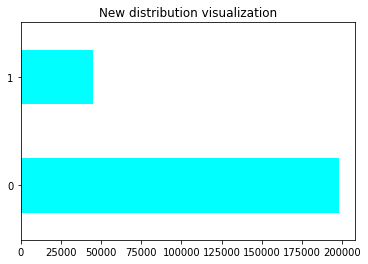

In [ ]:
import matplotlib.pyplot as plt
output_count = test_set['output'].value_counts()
output_count.plot(kind='barh', color='cyan')
plt.title('Test set distribution visualization')

In [ ]:
train_set['output'].value_counts()

0    461218
1    105746
Name: output, dtype: int64

Text(0.5, 1.0, 'Train set distribution visualization')

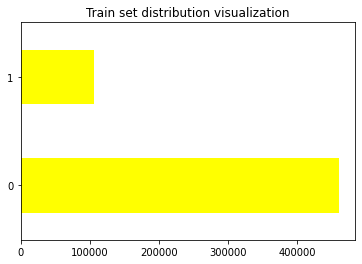

In [ ]:
import matplotlib.pyplot as plt
output_count = train_set['output'].value_counts()
output_count.plot(kind='barh', color='yellow')
plt.title('Train set distribution visualization')

**UNDER SAMPLING**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/fypdataset/zscore_train.csv')

In [ ]:
instances_class_0, instances_class_1 = dataset['output'].value_counts()

In [ ]:
instances_class_1

105746

In [ ]:
class_0 = dataset[dataset['output']==0] #benign instances moved to class_0 variable
class_1 = dataset[dataset['output']==1] #attack instances moved to class_0 variable

In [ ]:
#using the sample function inbuilt in pandas 
new_benign_undersampled = class_0.sample(instances_class_1)
new_benign_undersampled.shape

(105746, 13)

**COMBINING BOTH THE INSTANCES OF BENIGN AND ATTACK**

In [ ]:
dataset_undersampled = pd.concat([new_benign_undersampled, class_1], axis=0)

In [5]:
dataset_undersampled =  pd.read_csv('/content/drive/MyDrive/FYP /DATASETS /train_undersampled.csv')

In [ ]:
print(dataset_undersampled)

        fwd packet length mean  ...  output
504379               -0.156209  ...       0
549931               -0.137466  ...       0
409488               -0.186197  ...       0
314454               -0.287407  ...       0
393176               -0.058747  ...       0
...                        ...  ...     ...
566925               -0.302401  ...       1
566943               -0.204939  ...       1
566944               -0.302401  ...       1
566953               -0.302401  ...       1
566954               -0.302401  ...       1

[211492 rows x 13 columns]


In [6]:
dataset_undersampled['output'].value_counts()

1    105746
0    105746
Name: output, dtype: int64

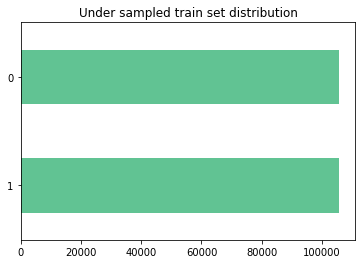

In [8]:
import matplotlib.pyplot as plt
counts = dataset_undersampled['output'].value_counts()
counts.plot(kind='barh', color='#61C393')
plt.title('Under sampled train set distribution')
plt.show()

In [ ]:
dataset_undersampled.to_csv('undersampled_final.csv', index=False)

**OVER SAMPLING**

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/fypdataset/zscore_train.csv')

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566964 entries, 0 to 566963
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       566964 non-null  float64
 1   total length of fwd packets  566964 non-null  float64
 2   init_win_bytes_forward       566964 non-null  float64
 3   average packet size          566964 non-null  float64
 4   destination port             566964 non-null  float64
 5   bwd packet length max        566964 non-null  float64
 6   bwd packet length min        566964 non-null  float64
 7   bwd packet length std        566964 non-null  float64
 8   subflow bwd packets          566964 non-null  float64
 9   flow duration                566964 non-null  float64
 10  bwd packets/s                566964 non-null  float64
 11  subflow fwd packets          566964 non-null  float64
 12  output                       566964 non-null  int64  
dtyp

In [ ]:
dataset['output'].value_counts()

0    461218
1    105746
Name: output, dtype: int64

In [ ]:
pip install -U imbalanced-learn

In [ ]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
print(y.value_counts())

0    461218
1    105746
Name: output, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote_obj = SMOTE(sampling_strategy = 'minority')
x_samples, y_samples = smote_obj.fit_resample(x, y)

In [ ]:
print(y_samples.value_counts())

1    461218
0    461218
Name: output, dtype: int64


In [ ]:
oversampled = pd.concat([x_samples, y_samples], axis=1)

In [ ]:
oversampled.tail(10)

,fwd packet length mean,total length of fwd packets,init_win_bytes_forward,average packet size,destination port,bwd packet length max,bwd packet length min,bwd packet length std,subflow bwd packets,flow duration,bwd packets/s,subflow fwd packets,output
922426,-0.287407,-0.109526,1.547630,-0.598505,-0.417096,-0.535892,-0.452474,-0.631128,-0.009024,-0.400868,1.621833,-0.011498,1
922427,0.031218,0.200801,1.547630,-0.383363,-0.471073,-0.140977,0.277640,-0.486534,-0.008094,-0.028508,-0.197092,0.014585,1
922428,-0.287407,-0.109526,1.547630,-0.598505,0.572469,-0.535892,-0.452474,-0.582860,-0.009024,-0.400866,0.084119,-0.011498,1
922429,-0.287407,-0.106736,-0.514884,-0.588304,-0.468044,1.839298,-0.452474,1.640100,-0.005083,-0.135695,-0.197078,-0.007772,1
922430,-0.302401,-0.110146,-0.460158,-0.593405,-0.294578,-0.535892,-0.452474,-0.343506,-0.009024,-0.400867,0.226794,-0.011498,1
922431,-0.302401,-0.110146,-0.460158,-0.593405,-0.378349,-0.535892,-0.452474,-0.568187,-0.009024,-0.400866,0.115815,-0.011498,1
922432,-0.287407,-0.106736,-0.514884,-0.588304,-0.468044,1.244890,-0.452474,0.923874,-0.005085,-0.269512,0.257600,-0.007772,1
922433,-0.287407,-0.106736,-0.514884,-0.588304,-0.468044,-0.535892,-0.452474,-0.390276,-0.009024,-0.037239,0.315905,-0.007772,1
922434,-0.302401,-0.110146,-0.460158,-0.593405,-0.469100,-0.535892,-0.452474,-0.343506,-0.009024,-0.400867,0.226494,-0.011498,1
922435,-0.287407,-0.109526,1.547630,-0.598505,1.239488,-0.535892,-0.452474,-0.528753,-0.009024,-0.400867,0.275337,-0.011498,1


In [ ]:
dataset_new = dataset_new.drop_duplicates()

In [ ]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922436 entries, 0 to 922435
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       922436 non-null  float64
 1   total length of fwd packets  922436 non-null  float64
 2   init_win_bytes_forward       922436 non-null  float64
 3   average packet size          922436 non-null  float64
 4   destination port             922436 non-null  float64
 5   bwd packet length max        922436 non-null  float64
 6   bwd packet length min        922436 non-null  float64
 7   bwd packet length std        922436 non-null  float64
 8   subflow bwd packets          922436 non-null  float64
 9   flow duration                922436 non-null  float64
 10  bwd packets/s                922436 non-null  float64
 11  subflow fwd packets          922436 non-null  float64
 12  output                       922436 non-null  int64  
dtyp

In [ ]:
no_greater = dataset_new[(dataset_new < 3).all(axis=1)]

In [ ]:
no_less = no_greater[(no_greater > -3).all(axis=1)]

In [ ]:
dataset = no_less

In [9]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/FYP /DATASETS /train_oversampled.csv')

In [10]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922436 entries, 0 to 922435
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       922436 non-null  float64
 1   total length of fwd packets  922436 non-null  float64
 2   init_win_bytes_forward       922436 non-null  float64
 3   average packet size          922436 non-null  float64
 4   destination port             922436 non-null  float64
 5   bwd packet length max        922436 non-null  float64
 6   bwd packet length min        922436 non-null  float64
 7   bwd packet length std        922436 non-null  float64
 8   subflow bwd packets          922436 non-null  float64
 9   flow duration                922436 non-null  float64
 10  bwd packets/s                922436 non-null  float64
 11  subflow fwd packets          922436 non-null  float64
 12  output                       922436 non-null  int64  
dtyp

In [11]:
dataset['output'].value_counts()

1    461218
0    461218
Name: output, dtype: int64

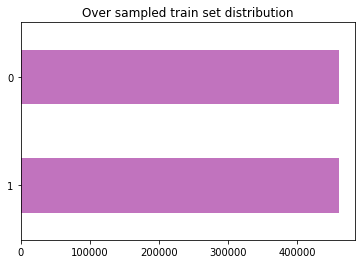

In [12]:
import matplotlib.pyplot as plt
counts = dataset['output'].value_counts()
counts.plot(kind='barh', color='#C173BE')
plt.title('Over sampled train set distribution')
plt.show()

In [ ]:
dataset_new.to_csv('train_oversampled.csv', index=False)

In [ ]:
oversam = pd.read_csv('train_oversampled.csv')
print(oversam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922436 entries, 0 to 922435
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fwd packet length mean       922436 non-null  float64
 1   total length of fwd packets  922436 non-null  float64
 2   init_win_bytes_forward       922436 non-null  float64
 3   average packet size          922436 non-null  float64
 4   destination port             922436 non-null  float64
 5   bwd packet length max        922436 non-null  float64
 6   bwd packet length min        922436 non-null  float64
 7   bwd packet length std        922436 non-null  float64
 8   subflow bwd packets          922436 non-null  float64
 9   flow duration                922436 non-null  float64
 10  bwd packets/s                922436 non-null  float64
 11  subflow fwd packets          922436 non-null  float64
 12  output                       922436 non-null  int64  
dtyp